In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def model(T, s):
    adim_T = (T + 273.15)/300.0
    alt_salinity = s * 1000.0

    k_partial = 0.797015 * adim_T**-0.194 - 0.251242 * adim_T**4.717 + 0.096437 * adim_T**-6.385 - 0.032696 * adim_T**-2.134

    k_model = k_partial / (1 - 0.00022 * alt_salinity)
    return(k_model)

In [18]:
MH2O = 18.016
MNaCl = 58.44

def modelNEW(T, s, P):
    #kH2O = 7e-9 * T**3 - 1.5113e-5 * T**2 + 8.801e-3 * T - 0.8624 + 1.57e-6 * P*T
    adim_T = T /300.0
    kH2O = 0.797015 * adim_T**(-0.194) - 0.251242 * adim_T**4.717 + 0.096437 * adim_T**(-6.385) - 0.032696 * adim_T**(-2.134)

    xCl = MH2O * s/((1-s)*MNaCl + MH2O*s)
    kIS = xCl * (-0.360439 + 0.006076 * np.exp(-0.023 * (T - 273.15)))

    b10 =  104.342
    b20 = -107.524
    b3  = -0.0792811
    b1T = -0.011250
    b2T = -0.0112584
    
    b1 = b10 * np.exp(b1T * T )
    b2 = b20 * np.exp(b2T * T )

    #b = b1 + b2 * np.exp(b3 * I05)
    
    k_NEW = kH2O - kIS
    return(k_NEW)

In [19]:
s0 = 0.0
smax = 0.23

N = 1000

ds = smax/N

N120 = int(np.floor(0.12/ds))

T0 = 40.0
P0 = 0.08

In [20]:
veck_model = []
veck_NEW = []
vecs = []

for i in range(N):
    s = s0 + i * ds

    k_model = model(T0, s)
    k_NEW = modelNEW(T0+273.15, s, P0)

    veck_model.append(k_model)
    veck_NEW.append(k_NEW)
    vecs.append(s)

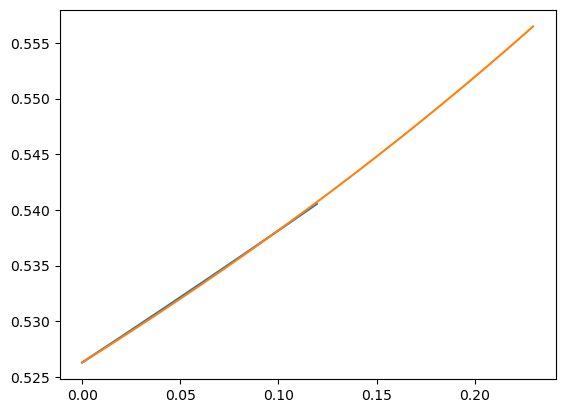

In [21]:

plt.plot(vecs[:N120],veck_model[:N120],vecs,veck_NEW)
plt.show()

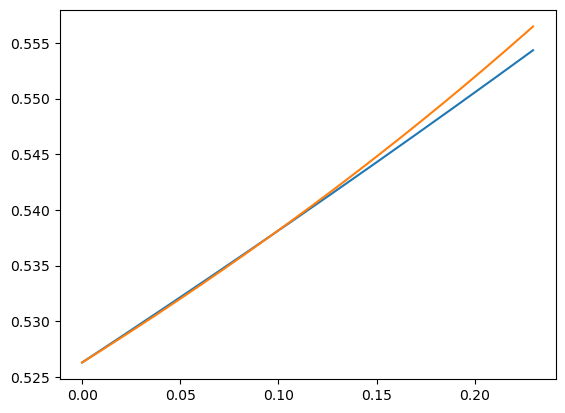

In [22]:
plt.plot(vecs,veck_model,vecs,veck_NEW)
plt.show()

In [ ]:
error = abs(np.array(veck_model)-np.array(veck_NEW))
plt.plot(vecs,error)
plt.show()

In [ ]:
rel_error = 100*abs(np.array(veck_model)-np.array(veck_NEW))/np.array(veck_model)
plt.plot(vecs,rel_error)
plt.show()